In [15]:
if (!require("pacman")) install.packages("pacman")
library("pacman")

# Installs any missing packages and loads them
pacman::p_load(readr, ggplot2, dplyr, tidyr, glue, readxl, patchwork);

In [16]:
proj_data_dir <- "/Users/mmir/Library/CloudStorage/Dropbox/git/i58_g3_g4_CF"

In [17]:
fpi <- glue('{proj_data_dir}/med/m4__total_track_time.xlsx')

df <- read_excel(fpi)

In [18]:
df

participant.code,page_index,epoch_time_completed,total_track_time_sec,participant.payoff,Introduction.1.player.MTurk_ID,track,track_abbreviation,total_track_time_min
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
01w754mc,31,1739475156,1582,7.20,A37SLQRKOALNV6,Comparison Small Incentivized,CSI,26.366667
0hzkyp1h,21,1739475209,1253,1.60,A8YS9CR6LM7Y9,Transitivity Small Unincentivized,TSU,20.883333
1jhm85o1,31,1739654483,1909,7.20,A3HSONMX6LNZR4,Comparison Small Incentivized,CSI,31.816667
24ihcolp,30,1739548020,412,1.60,A3AY0315YWWNXY,Comparison Small Unincentivized,CSU,6.866667
25gj04o3,22,1739469955,772,2.75,A2FFMN0E9IUKQ6,Transitivity Small Incentivized,TSI,12.866667
4ehzz2gc,30,1739299885,1111,3.20,A2EM7RPFW3DU9N,Comparison Large,CL,18.516667
4tfn0in5,22,1739491886,629,2.55,A2E6Z6NDAES26P,Transitivity Small Incentivized,TSI,10.483333
578ix8xp,30,1739471049,649,1.60,A399GYOD60WD7M,Comparison Small Unincentivized,CSU,10.816667
7192rt4q,21,1739470281,1271,3.20,A2BABL5AHUOYC7,Tranisitivity Large,TL,21.183333


# Total Survey Time Histogram for All Tracks

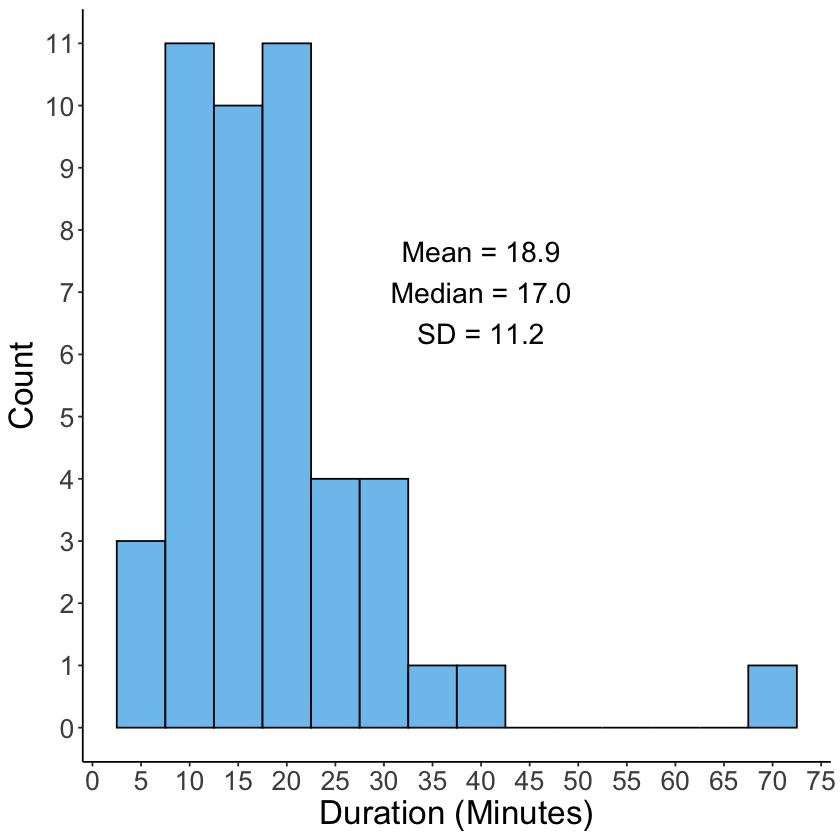

In [19]:
# Calculate summary statistics
mean_val <- mean(df$total_track_time_min, na.rm = TRUE)
median_val <- median(df$total_track_time_min, na.rm = TRUE)
sd_val <- sd(df$total_track_time_min, na.rm = TRUE)

# Create label string
label_text <- sprintf("Mean = %.1f\nMedian = %.1f\nSD = %.1f", mean_val, median_val, sd_val)


all_tracks_hist <- ggplot(data.frame(df), aes(x = total_track_time_min)) +
geom_histogram(binwidth = 5, fill = "#56B4E9", colour = "black", alpha = 0.8) +
labs(x = "Duration (Minutes)",
y = "Count") +
scale_x_continuous(breaks=seq(0,155,5)) +
scale_y_continuous(breaks=seq(0,20,1)) +
theme_bw() +
theme(
text = element_text(size = 20),
panel.border = element_blank(),
panel.grid.major = element_blank(),
panel.grid.minor = element_blank(),
axis.line = element_line(colour = "black")
) +
annotate("text",
x = 40,  # place near center
y = 7,
label = label_text,
size = 6,
color = "black",
hjust = 0.5)

print(all_tracks_hist)

In [20]:
fpo <- glue('{proj_data_dir}/out_fig/f1__total_track_time.png')

ggsave(fpo, all_tracks_hist, width = 10, height = 6, dpi = 300)

# Total Survey Time by Track

In [21]:
# Get unique groups in column c
groups <- unique(df$track_abbreviation)

print(groups)


hist_by_track <- function(group_name, text_x, text_y) {

df_group <- df %>% filter(track_abbreviation == group_name)

# Calculate stats
mean_val <- mean(df_group$total_track_time_min, na.rm = TRUE)
median_val <- median(df_group$total_track_time_min, na.rm = TRUE)
sd_val <- sd(df_group$total_track_time_min, na.rm = TRUE)

label_text <- sprintf("Track = %s\nMean = %.1f\nMedian = %.1f\nSD = %.1f",
group_name, mean_val, median_val, sd_val)

# Create the plot
p <- ggplot(df_group, aes(x = total_track_time_min)) +
geom_histogram(binwidth = 5, fill = "orange", colour = "black", alpha = 0.8) +
labs(x = "Duration (Minutes)", y = "Count") +
scale_x_continuous(breaks = seq(0, 155, 5)) +
scale_y_continuous(breaks = seq(0, 20, 1)) +
theme_bw() +
theme(
text = element_text(size = 14),
panel.border = element_blank(),
panel.grid.major = element_blank(),
panel.grid.minor = element_blank(),
axis.line = element_line(colour = "black")
) +
annotate("text",
x = text_x,
y = text_y,
label = label_text,
size = 3,
color = "black",
hjust = 0.5)

return (p)}

[1] "CSI" "TSU" "CSU" "TSI" "CL"  "TL" 


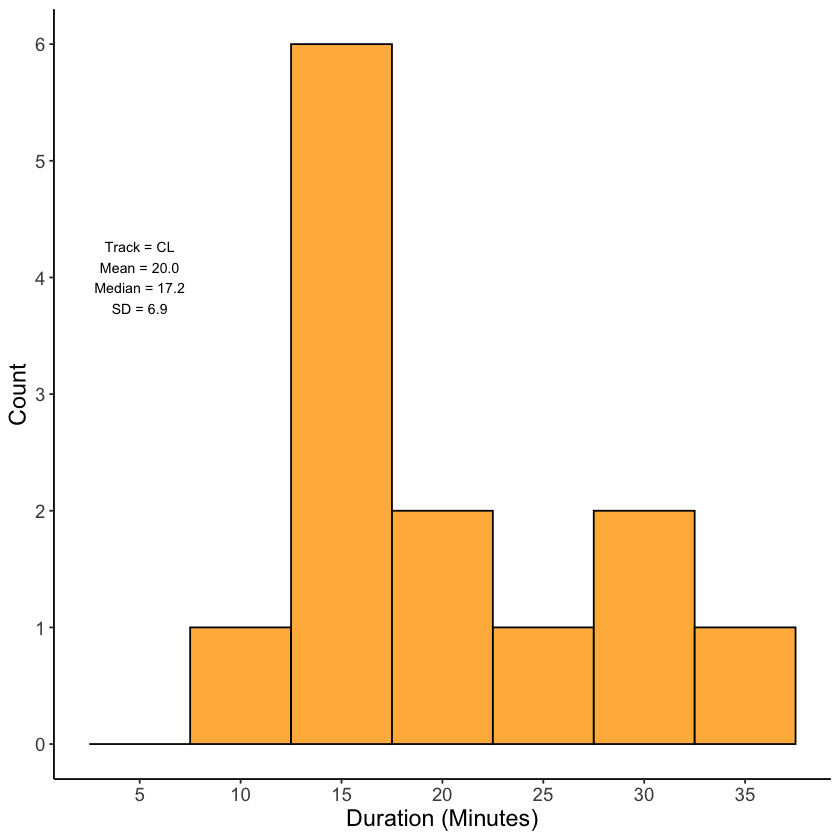

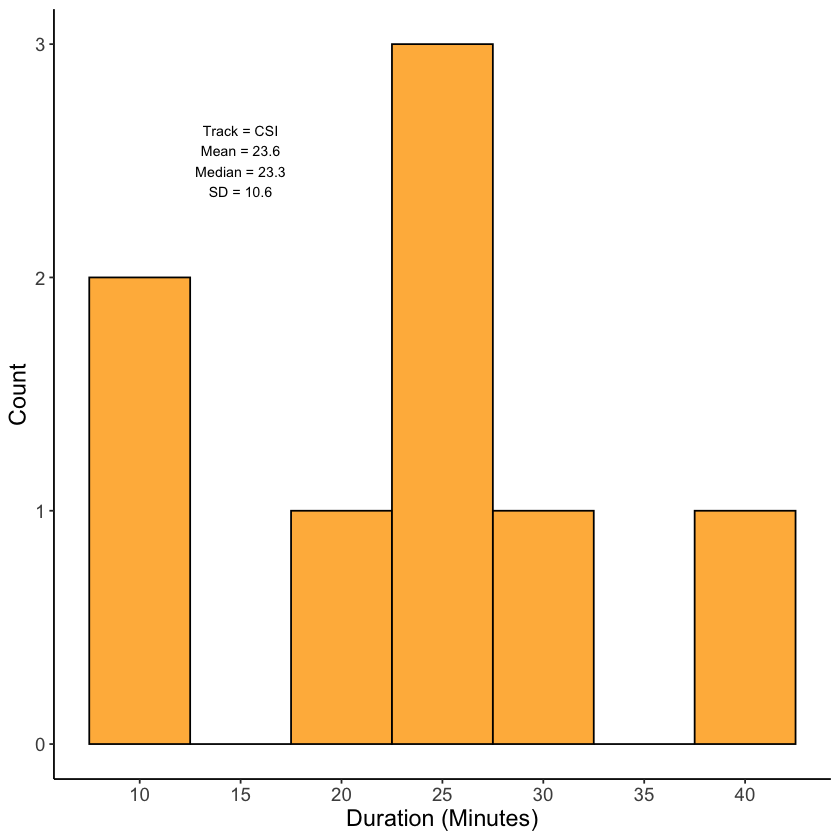

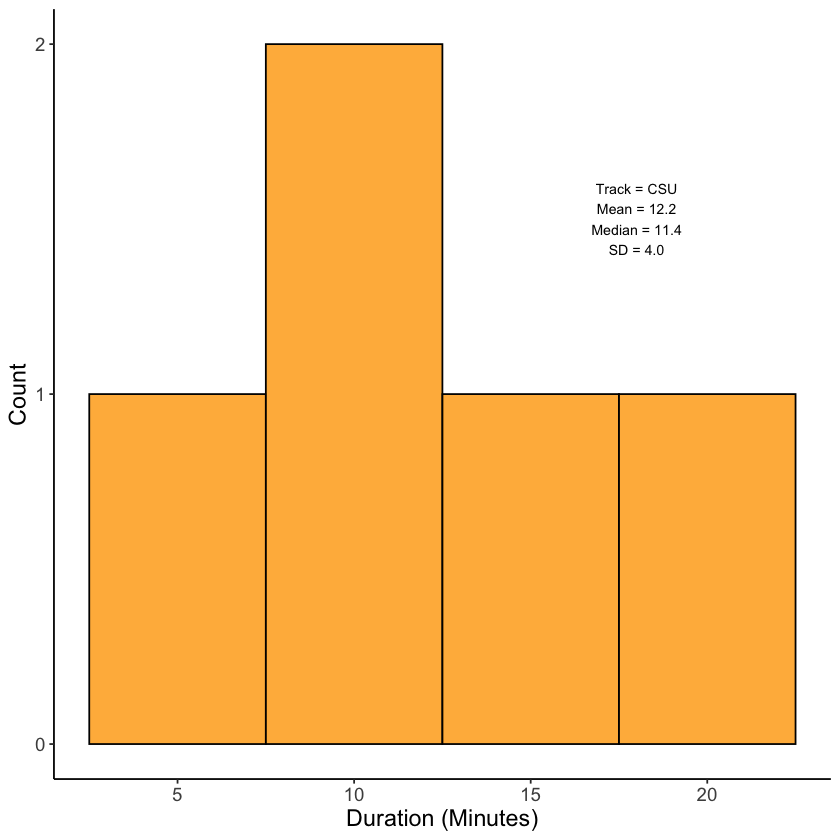

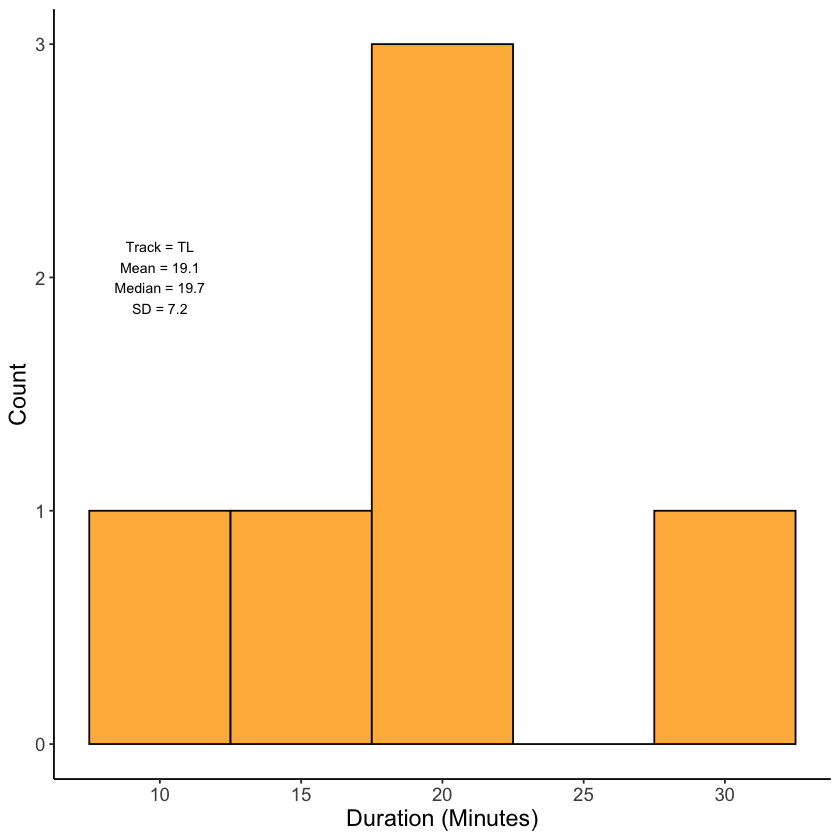

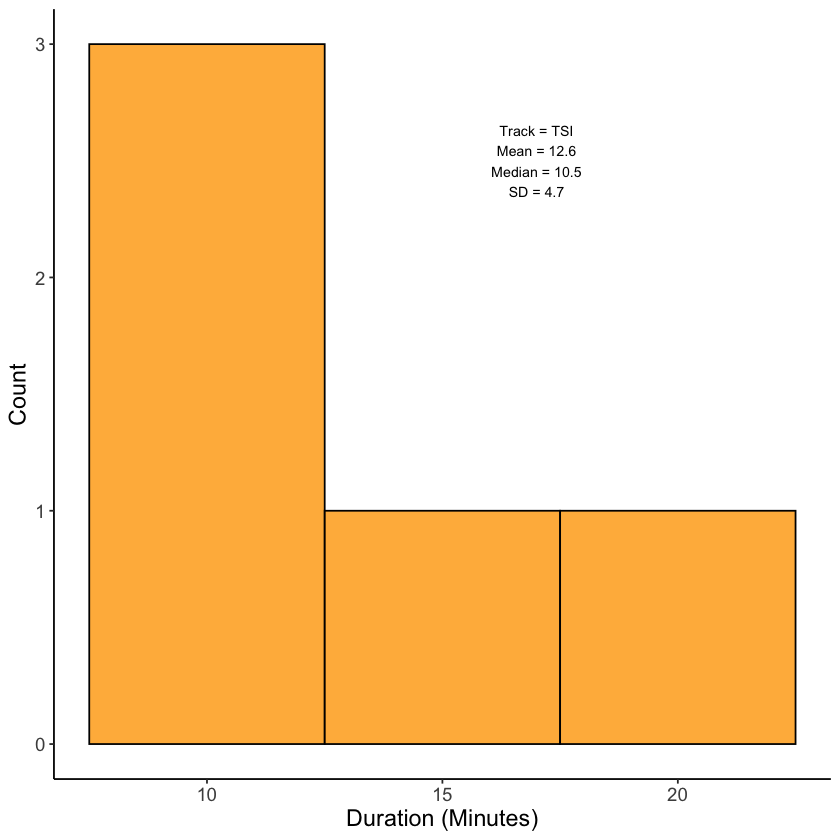

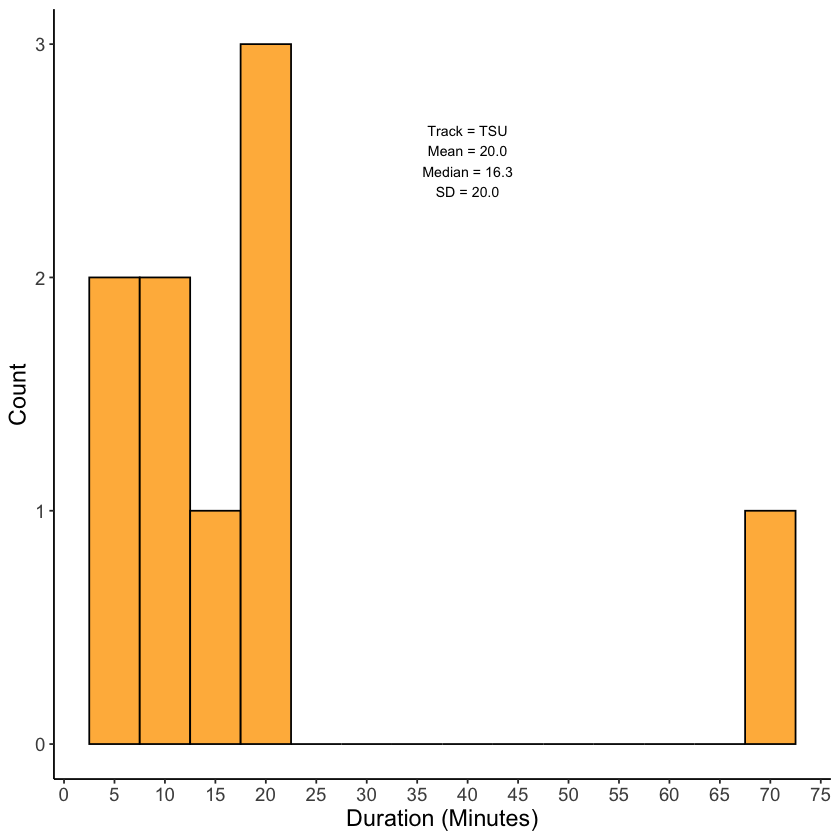

In [22]:
p1 <- hist_by_track("CL" , 5 , 4)
p1

p2 <- hist_by_track("CSI" , 15 , 2.5)
p2

p3 <- hist_by_track("CSU" , 18 , 1.5)
p3

p4 <- hist_by_track("TL" , 10 , 2)
p4

p5 <- hist_by_track("TSI" , 17 , 2.5)
p5

p6 <- hist_by_track("TSU" , 40 , 2.5)
p6

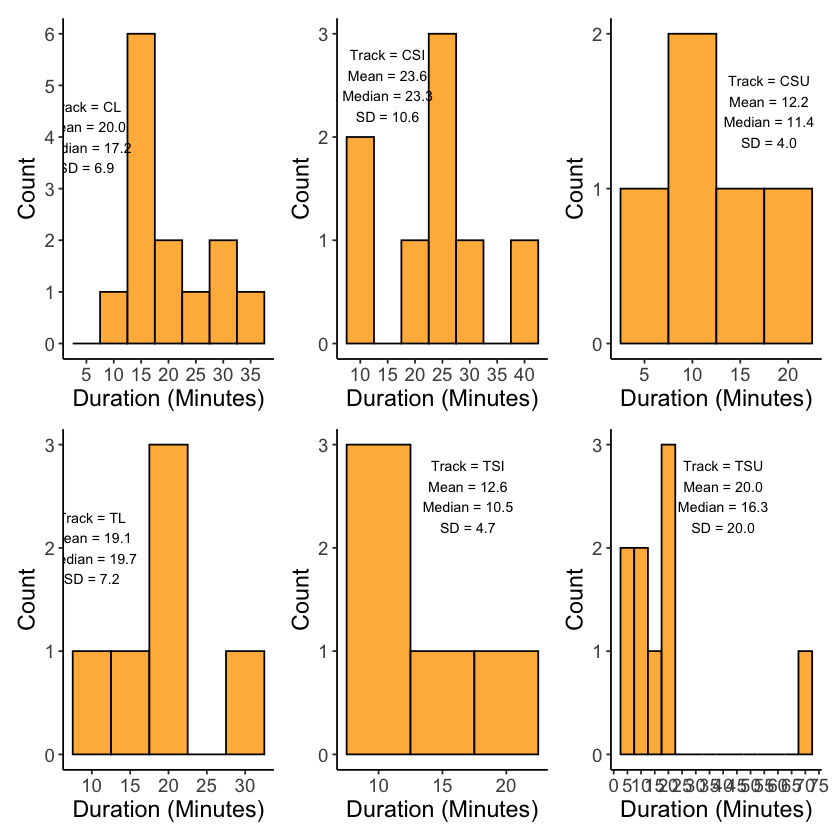

In [23]:
# Combine all 6 plots into a 3x2 grid
final_plot <- (p1 | p2 | p3) / (p4 | p5 | p6)
final_plot

In [24]:
fpo <- glue('{proj_data_dir}/out_fig/f2__total_track_time_by_track.png')
ggsave(fpo , final_plot , width = 12 , height = 8)